In [43]:
import lr_scheduler_new

In [42]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import Dataset
from torchvision import transforms, utils
import transforms
import matplotlib.pyplot as plt
from lr_scheduler_new import CosineAnnealingLR_with_Restart
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
%reload_ext autoreload
%autoreload 2

In [4]:
class SimpleModel(nn.Module):
    
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(2, 2)
        
    def foward(self, x):
        x = self.fc(x)
        return x

In [13]:
def simulate_lrs(t_max, t_mult, epochs):
    
    model = SimpleModel()
    #optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
    sgdr = CosineAnnealingLR_with_Restart(optimizer, T_max=t_max, T_mult=t_mult, model=model, out_dir='blank', \
                                               take_snapshot=False, eta_min=1e-3)
    
    for i in range(epochs):
        sgdr.step()
        lr = optimizer.param_groups[0]['lr']

    fig, ax = plt.subplots(figsize=(20, 4))
    ax.plot([x[0] for x in sgdr.lr_history])
    print(sgdr.lr_history)
    print("optimizer.param_groups",optimizer.param_groups)
    print("base_lrs",sgdr.base_lrs)
    ax.set_yscale("log")
    plt.show()

restart at epoch 010
restart at epoch 020
restart at epoch 030
restart at epoch 040
restart at epoch 050
restart at epoch 060
restart at epoch 070
restart at epoch 080
restart at epoch 090
restart at epoch 100


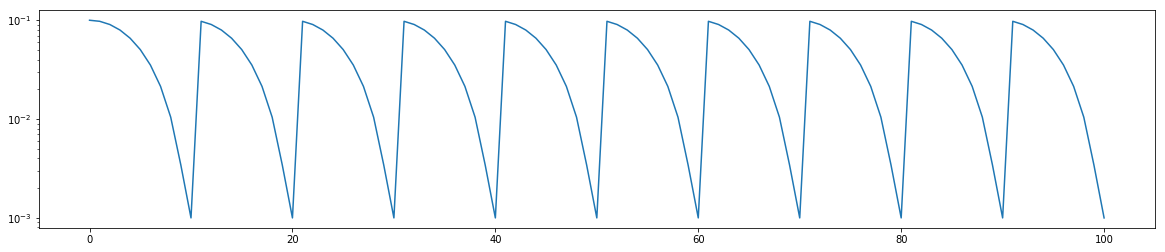

In [6]:
simulate_lrs(10, 1, 100)

restart at epoch 010
restart at epoch 030
restart at epoch 070


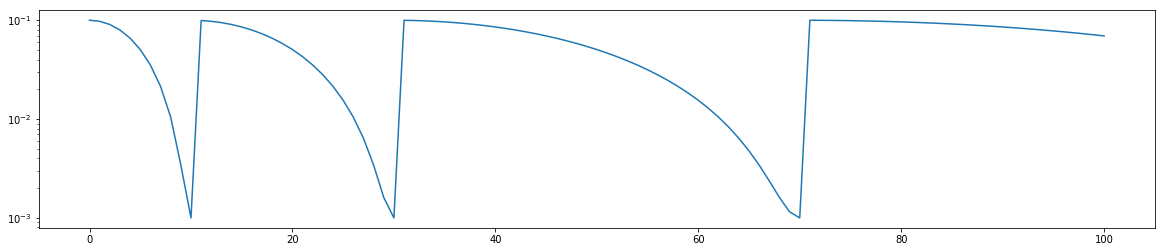

In [7]:
simulate_lrs(10, 2, 100)

restart at epoch 001
restart at epoch 003
restart at epoch 007
restart at epoch 015
restart at epoch 031
restart at epoch 063


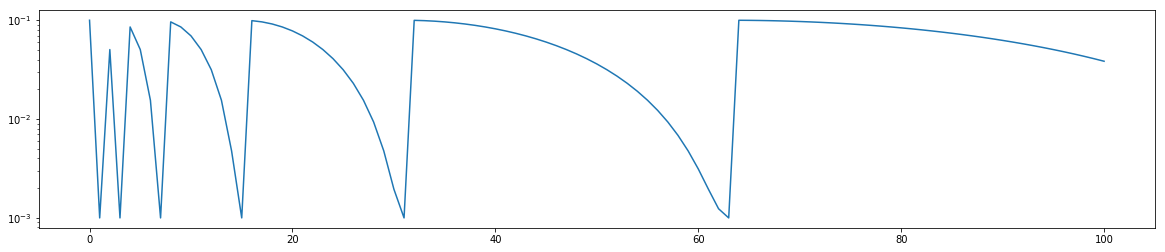

In [8]:
simulate_lrs(1, 2, 100)

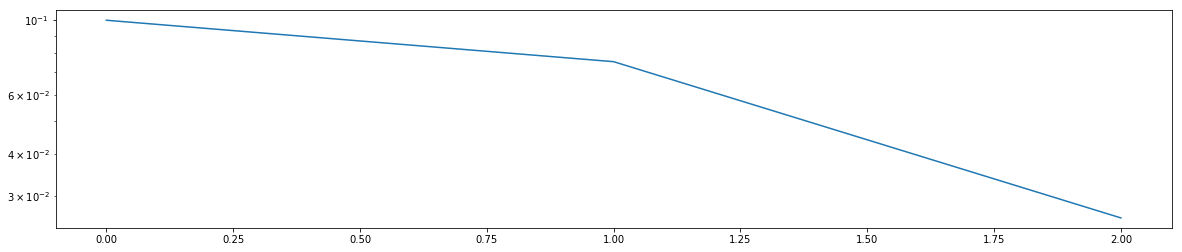

In [9]:
simulate_lrs(3, 2, 2)

epoch : 0
base_lrs [0.0001]
self.eta_min + (base_lr - self.eta_min) = 0.000100
(1 + math.cos(math.pi * self.current_epoch / self.Te)) / 2 = 1.000000
get_lr : [0.00010000000000000005]
epoch : 0
base_lrs [0.0001]
self.eta_min + (base_lr - self.eta_min) = 0.000100
(1 + math.cos(math.pi * self.current_epoch / self.Te)) / 2 = 0.000000
get_lr : [0.001]
restart at epoch 001
next goal 1
T_max 2
epoch : 1
base_lrs [0.0001]
self.eta_min + (base_lr - self.eta_min) = 0.000100
(1 + math.cos(math.pi * self.current_epoch / self.Te)) / 2 = 0.000000
get_lr : [0.001]
restart at epoch 002
next goal 1
T_max 3
epoch : 2
base_lrs [0.0001]
self.eta_min + (base_lr - self.eta_min) = 0.000100
(1 + math.cos(math.pi * self.current_epoch / self.Te)) / 2 = 0.000000
get_lr : [0.001]
restart at epoch 003
next goal 1
T_max 4
[[0.00010000000000000005], [0.001], [0.001], [0.001]]
optimizer.param_groups [{'params': [Parameter containing:
 0.0481  0.2314
-0.4189  0.2436
[torch.FloatTensor of size 2x2]
, Parameter containi

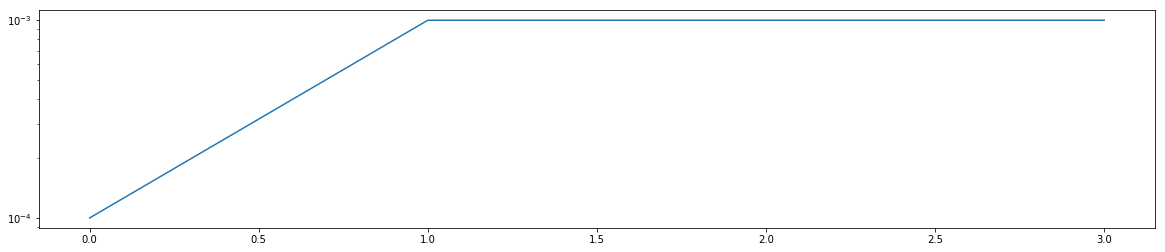

In [45]:
simulate_lrs(1, 1, 3)